In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#Analyze survival rate based on ticket fare brackets

fare_bins = [0,25,50,100,250,data["Fare"].max()]
fare_labels = ["0-25","25-50","50-100","100-250","250+"]

data["FareGroup"] = pd.cut(data["Fare"],bins=fare_bins , labels = fare_labels)
data[["FareGroup","Fare"]]

Survival_rate = data.groupby("FareGroup")["Survived"].mean()*100
Survival_rate

C:\Users\sumit\AppData\Local\Temp\ipykernel_2248\1753047308.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Survival_rate = data.groupby("FareGroup")["Survived"].mean()*100


FareGroup
0-25       29.335793
25-50      41.954023
50-100     65.420561
100-250    72.727273
250+       77.777778
Name: Survived, dtype: float64

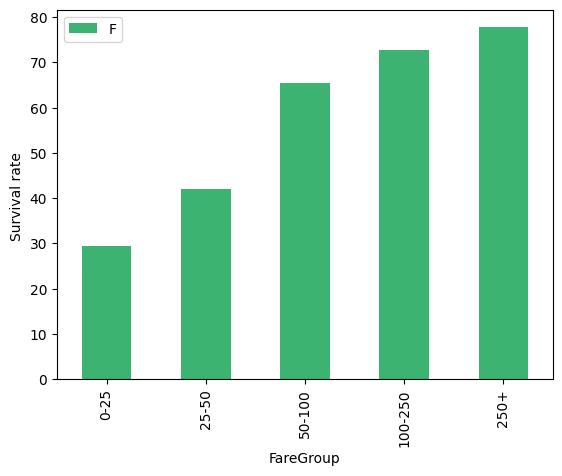

In [10]:
Survival_rate.plot(kind = "bar" , color="mediumseagreen" )
plt.xlabel("FareGroup")
plt.ylabel("Survival rate ")
plt.legend("FareGroup Survival rate")
plt.show()

In [13]:
#Compare survival rate by age and sex using a grouped bar chart

age_bins = [0,12,18,35,60,100]
age_labels = ["Child","teen", "adult" , "mid" , "old" ]
data["AgeGroup"] = pd.cut(data["Age"],bins=age_bins,labels= age_labels)
data[["AgeGroup","Age"]]

survival_rate = data.groupby(["AgeGroup","Sex"])["Survived"].mean().unstack()*100
survival_rate

C:\Users\sumit\AppData\Local\Temp\ipykernel_2248\2614423980.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = data.groupby(["AgeGroup","Sex"])["Survived"].mean().unstack()*100


Sex,female,male
AgeGroup,,
Child,59.375000,56.756757
teen,75.000000,8.823529
adult,78.333333,18.067227
mid,77.142857,19.200000
old,100.000000,10.526316


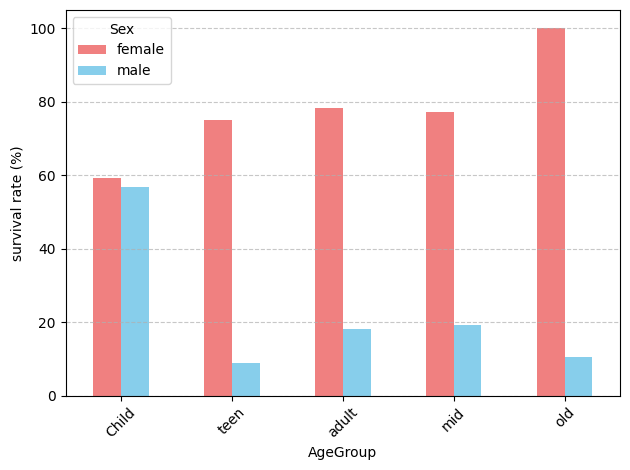

In [18]:
survival_rate.plot(kind = "bar" , color = ["lightcoral","skyblue"])
plt.ylabel("survival rate (%)")
plt.xlabel("AgeGroup")
plt.xticks(rotation=45)
plt.grid(axis ="y",linestyle ="--" , alpha = 0.7)
plt.tight_layout()
plt.show()

C:\Users\sumit\AppData\Local\Temp\ipykernel_2248\3483189499.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Survival_rate = data.groupby("NameLengthGroup")["Survived"].mean()*100


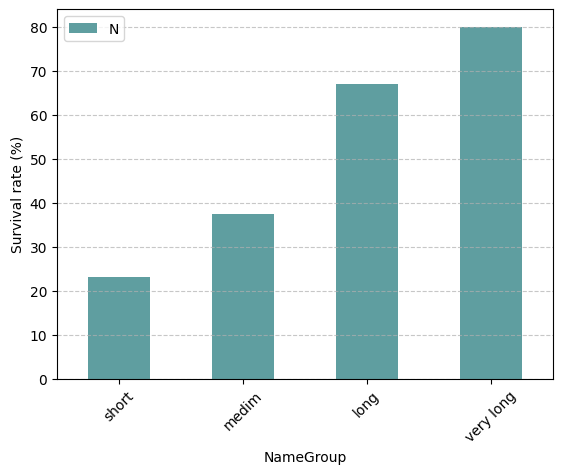

In [27]:
#Is there a difference in survival rate based on the length of passenger names?

data["NameLength"] = data["Name"].apply(len)
data[["NameLength","Name"]]

bins=[0,20,35,50,100]
labels = ["short","medim","long","very long"]
data["NameLengthGroup"] = pd.cut(data["NameLength"] , bins = bins ,labels=labels)
data[["NameLengthGroup" ,"Name"]]

Survival_rate = data.groupby("NameLengthGroup")["Survived"].mean()*100
Survival_rate.plot(kind="bar" , color='cadetblue')
plt.ylabel("Survival rate (%)")
plt.xlabel("NameGroup")
plt.legend("NameLenthGroup")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [36]:
#How did the survival rate vary across passenger ID ranges (early vs late entries)?

data["PassengerGroup"] = pd.cut(data["PassengerId"],bins = 5)
survival_rate_bypassengers = data.groupby("PassengerGroup")["Survived"].mean()*100
survival_rate_bypassengers

C:\Users\sumit\AppData\Local\Temp\ipykernel_2248\1620096943.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_bypassengers = data.groupby("PassengerGroup")["Survived"].mean()*100


PassengerGroup
(0.11, 179.0]     32.960894
(179.0, 357.0]    44.382022
(357.0, 535.0]    38.764045
(535.0, 713.0]    40.449438
(713.0, 891.0]    35.393258
Name: Survived, dtype: float64

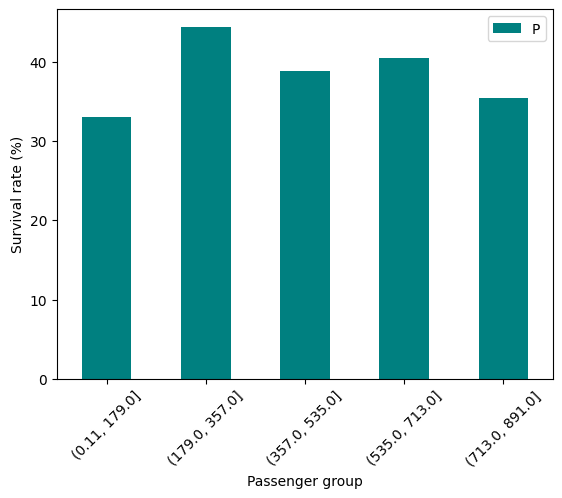

In [38]:
survival_rate_bypassengers.plot(kind ="bar",color = "teal")
plt.ylabel("Survival rate (%)")
plt.xlabel("Passenger group")
plt.xticks(rotation = 45)
plt.legend("Passenger Group")
plt.show()